In [3]:
####################
#important libraries

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as p
import sklearn as skl

In [5]:
#getting the training dataset 
train = pd.read_csv("train.csv")

In [6]:
#view dataframe
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
#getting the first 5 rows
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#getting column names
list(train)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [9]:
#type of train
type(train)

pandas.core.frame.DataFrame

In [10]:
#type of data in dataset
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
#info about data: great of finding what missing
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [12]:
# 3 features have missing data -> Age (714 entries), Cabin (204 entries) and Embarked (889 entries)
sum(train['Age'].isnull())

177

In [13]:
# 177 age entries are missing

sum(train['Cabin'].isnull())

687

In [14]:
# 687 cabin entries are missing

sum(train['Embarked'].isnull())

2

In [15]:
# 2 embarked entries are missing
# describing data
train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
# referncing
train['Age'][0:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [17]:
# unique values
train.Sex.unique()

array(['male', 'female'], dtype=object)

In [18]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [19]:
train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [20]:
# getting subsets
train[['Sex','Embarked','Pclass']]

,Sex,Embarked,Pclass
0,male,S,3
1,female,C,1
2,female,S,3
3,female,S,1
4,male,S,3
5,male,Q,3
6,male,S,1
7,male,S,3
8,female,S,3
9,female,C,2


In [27]:
for i in range(1,4):
    print ((i,len(train[(train['Sex'] == 'male')&(train['Pclass'] == i)])))

(1, 122)
(2, 108)
(3, 347)


In [28]:
for i in range(1,4):
    print ((i,len(train[(train['Sex'] == 'female')&(train['Pclass'] == i)])))

(1, 94)
(2, 76)
(3, 144)


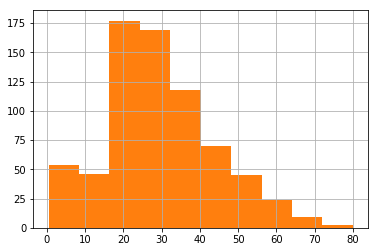

In [30]:
# Class 3 has more males and females compared to class 1 and 2

# Histogram of age
train['Age'].hist()
p.show()

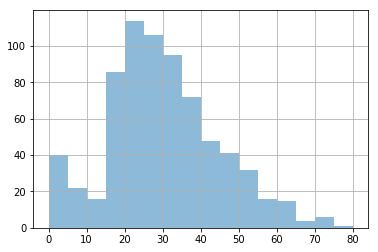

In [33]:
# histogram after dropping the missing values
train['Age'].dropna().hist(bins = 16, range = (0, 80), alpha = 0.5)
p.show()

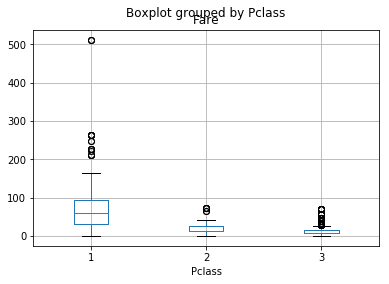

In [37]:

train.boxplot(column = 'Fare', by = 'Pclass')
p.show()

In [ ]:
# some passengers in class 1 has paid more than others. Maybe they paid for each member of their family